In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Part I. Review Questions

## 1.

## (a)

In [2]:
# Calculate expected return
er = (18 / 37) - (19 / 37)

In [3]:
er

-0.027027027027026973

In [4]:
# calculate variance
var = (18 / 37) * (1 - er)**2 + (19 / 37) * (-1 - er)**2

In [5]:
# calculate sharpe ratio
sr = er / np.sqrt(var)
sr

-0.027036903521793703

The expected return and Sharpe Ratio for the bet are very similar, both being about -2.7%.

## (b) 

In [6]:
# load s&p 500 adjusted closing prices
data = yf.download('^GSPC', start = '2000-01-01', end = '2024-12-31', 
                   interval = '1d', auto_adjust = False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [7]:
data.tail()

Ticker,^GSPC
Date,
2024-12-23,5974.069824
2024-12-24,6040.040039
2024-12-26,6037.589844
2024-12-27,5970.839844
2024-12-30,5906.939941


In [8]:
# simple returns
simple_returns = data.pct_change() * 100
simple_returns = simple_returns.dropna()

# expected returns
er = simple_returns['^GSPC'].mean()

# variance
var = simple_returns['^GSPC'].var()

# sharpe ratio
sr = er / np.sqrt(var)
sr

0.02436299185073516

The daily Sharpe Ratio for the S&P 500 when assuming a zero risk-free rate is about 0.024, which is larger than the Sharpe Ratio calculated from the bet in part (a).

## 2.

## (a)

$$E[Y_t] = P(r_t \leq x) = F(x)$$

The mean of the binary random variable $Y_t$ is equal to the CDF.

$$
Var(Y_t) = F(x)(1-F(x))
$$ 
if $r_t$ are i.i.d.

## (b)

Yes, $\hat{F}(x)$ is an unbiased estimator of $F(x)$

## (c)

$$Var(\hat{F}(x)) = Var(\frac{1}{T}\Sigma(Y_t))$$
$$=\frac{1}{T^2}\Sigma(Var(Y_t))$$
$$=\frac{1}{T^2}*T*F(x)(1-F(x))$$
$$Var(\hat{F}(x)) = \frac{F(x)(1-F(x))}{T}$$

## (d)

$$
MSE(\hat{F}(x)) = Var(\hat{F}(x))
$$
Since $\hat{F}(x)$ is unbiased. Yes, the MSE will go to zero as the sample size $T \rightarrow \infty$

## (e)

No, the answers in part (d) do not depend on the value of x.

## 3.

## (a)

$$
E[X] = E[U] * E[Z]
= E[U] * 0
= 0
$$

$\mu_X = 0$

$$Var(X) = E[X^2]$$
$$=E[U^2] * E[Z^2]$$
$$=((1^2 *0.8)+(5^2*0.2))*1$$
$$=5.8$$

$\sigma^2_X = 5.8$

## (b)

In [9]:
# Probability for U = 1
prob1 = 2 * (1 - norm.cdf(4 * np.sqrt(5.8)))

# Probability for U = 5
prob5 = 2 * (1 - norm.cdf((4 * np.sqrt(5.8)) / 5))

# Total probability
probX = 0.8 * prob1 + 0.2 * prob5
probX

0.01080452457925314

In [10]:
# Probability of Z
probZ = 2 * (1 - norm.cdf(4))
probZ

6.334248366623996e-05

$P(|X| > 4\sigma_X) = 1.08\%$ and $P(|Z| > 4\sigma_Z) \approx 0$

## (c)

$$K_X = E\left[\left(\frac{X - 0}{\sqrt{5.8}}\right)^4\right]$$
$$=\frac{E[X^4]}{5.8^2}$$
$$=\frac{((1^4*0.5)+(5^4*0.2))*3}{33.64}$$
$$K_X=11.192$$

Because the kurtosis is significantly larger than 3, X exhibits heavy tails

## (d)

$$F(x)=P(X\leq x)=P(UZ\leq x)$$
$$=0.8*P(Z\leq x)+0.2*P(5Z\leq x)$$
$$=0.8*P(Z\leq x)+0.2*P(Z\leq x/5)$$
$$=0.8\Phi(x)+0.2\Phi(x/5)$$

## (e)

$$f(x)=\frac{d}{dx}(0.8\Phi(x)+0.2\Phi(x/5)$$
$$=0.8\phi(x)+0.2\phi\left(x/5\right)\left(\frac{1}{5}\right)$$
where $\phi(x)$ is the standard normal PDF

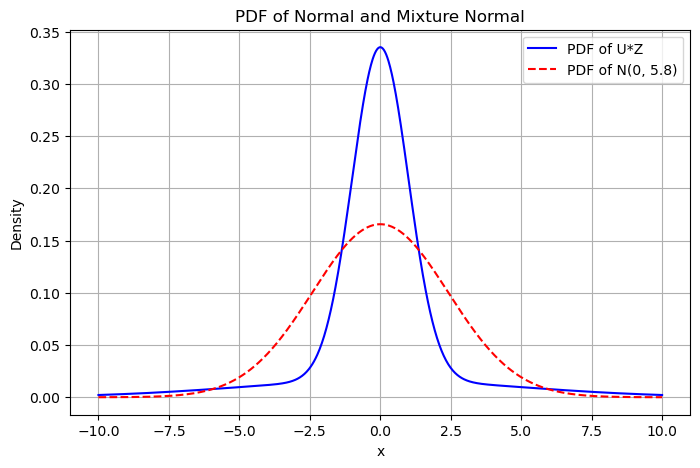

In [31]:
# Generate values of x
x = np.linspace(-10, 10, 1000)

# Compute PDFs
def X_pdf(x):
    return(0.8*norm.pdf(x) + 0.2*norm.pdf(x/5) / 5)

norm_pdf = norm.pdf(x, loc=0, scale=np.sqrt(5.8))

# Plot
plt.figure(figsize =(8, 5))
plt.plot(x, X_pdf(x), color='blue', label='PDF of U*Z')
plt.plot(x, norm_pdf, color='red', label='PDF of N(0, 5.8)', linestyle='dashed')
plt.ylabel('Density')
plt.xlabel('x')
plt.title('PDF of Normal and Mixture Normal')
plt.grid()
plt.legend()
plt.show()

The mixture pdf has a much higher peak than the normal pdf. The mixture pdf also has heavier tails, meaning extreme values are more probable.

## (f)

To create a family of asymmetric and heavy tailed distributions, we can use the Fernandez-Steel Skewed Normal.

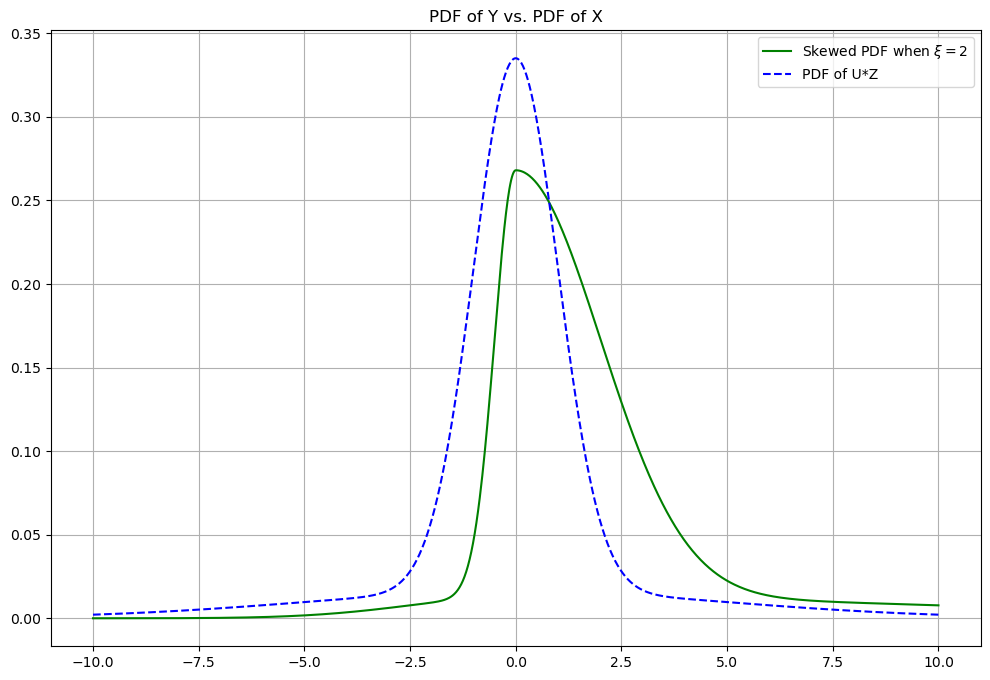

In [71]:
xi = 2
factor = 2/(xi + (1/xi))
skew_normal = np.where(x < 0, factor*X_pdf(x*xi), factor*X_pdf(x*(1/xi)))

plt.figure(figsize = (12, 8))
plt.plot(x, skew_normal, label = f"Skewed PDF when $\\xi={xi}$", color = 'green')
plt.plot(x, X_pdf(x), label = 'PDF of U*Z', color = 'blue', linestyle = 'dashed')
plt.grid()
plt.legend()
plt.title('PDF of Y vs. PDF of X')
plt.show()

## 4.

## (a)

When $\epsilon$ is small, like $\epsilon=10^-5$, then you can approximate the first and second order numerical derivatives as follows:
$$\frac{\partial g(\theta_0)}{\partial\theta} \approx \frac{g(\theta_0+\epsilon)-g(\theta_0-\epsilon)}{2\epsilon}$$
$$\frac{\partial^2 g(\theta_0)}{\partial\theta^2} \approx \frac{g(\theta_0+\epsilon)+g(\theta_0-\epsilon)-2g(\theta_0)}{\epsilon^2}$$

## (b)

In [13]:
from scipy.special import gamma

# Student-t PDF
def student_pdf(x, v):
    num = gamma((v+1) / 2)
    den = np.sqrt(np.pi*v)*gamma(v/2)
    pdf = (num/den) * (1+(x**2/v))**(-(v+1)/2)
    return(pdf)


# 1st order derivative
def first_deriv(x, v, eps=1e-5): 
    return((student_pdf(x, v + eps) - student_pdf(x, v - eps)) / (2*eps))

# 2nd order derivative
def second_deriv(x, v, eps=1e-5):
    return((student_pdf(x, v+eps) + student_pdf(x, v-eps) - 2*student_pdf(x, v)) / (eps)**2)

print('The first derivative is', first_deriv(1, 2))
print('The second derivative is', second_deriv(1, 2))

The first derivative is 0.0200379544151863
The second derivative is -0.016042167594321196


## (c)

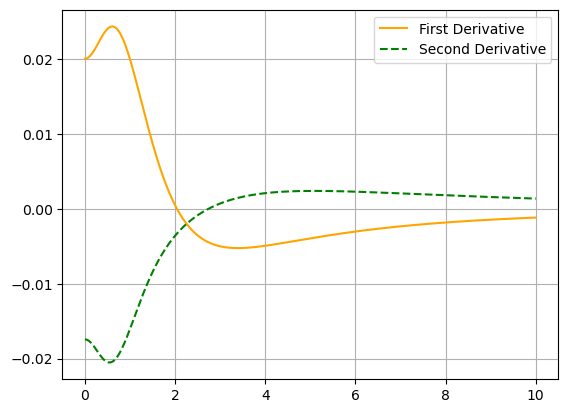

In [14]:
# Generate values of x
x = np.linspace(0, 10, 1000)

# Plot
plt.plot(x, first_deriv(x, 2), label = 'First Derivative', color = 'orange')
plt.plot(x, second_deriv(x, 2), label = 'Second Derivative', color = 'green', linestyle = "dashed")
plt.grid()
plt.legend()
plt.show()

# Part II. Data Exercises

## 1.

In [15]:
import yfinance as yf
data = yf.download('MSFT', start = '2022-01-02', end = '2024-12-30', interval = '1d', 
                   auto_adjust = False)['Adj Close']
data.head()

[*********************100%***********************]  1 of 1 completed


Ticker,MSFT
Date,
2022-01-03,326.287689
2022-01-04,320.692841
2022-01-05,308.382050
2022-01-06,305.945251
2022-01-07,306.101257


## (a)

In [16]:
# Log Returns
log_returns = np.log(data / data.shift(1)) * 100

# Drop na's
log_returns = log_returns.dropna()
log_returns.describe()

Ticker,MSFT
count,750.000000
mean,0.036965
std,1.738621
min,-8.029533
25%,-0.853933
50%,0.087487
75%,1.060565
max,7.905895


In [17]:
log_returns['MSFT'].std()**2

3.022801995664193

The sample mean of the daily log returns is about 0.037% and the sample variance of the daily log return is about 3.023.

## (b)

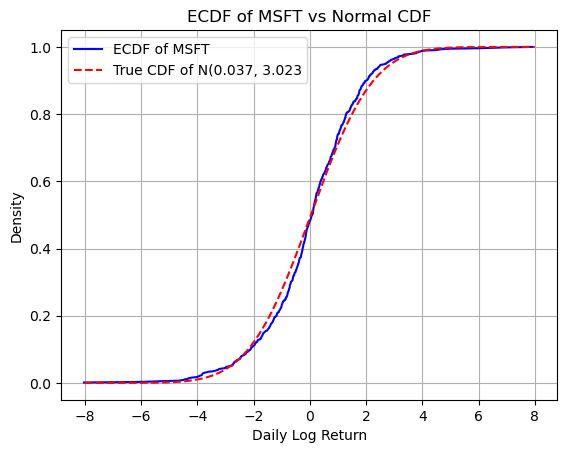

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF

# ECDF of Microsoft daily log returns
result = ECDF(log_returns['MSFT'])

x = np.linspace(-8, 8, 1000)

# Plot
plt.plot(result.x, result.y, color = 'blue', label = 'ECDF of MSFT')
plt.plot(x, norm.cdf(x, loc = log_returns.mean(), scale = log_returns.std()), color = 'red', 
         label = 'True CDF of N(0.037, 3.023', linestyle = 'dashed')
plt.grid()
plt.legend()
plt.xlabel('Daily Log Return')
plt.ylabel('Density')
plt.title('ECDF of MSFT vs Normal CDF')
plt.show()

## (c)

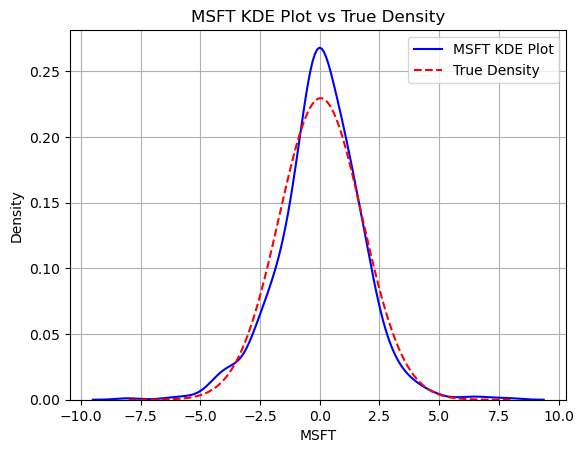

In [19]:
# Plot KDE of MSFT
sns.kdeplot(log_returns['MSFT'].dropna(), bw_method='silverman', label = 'MSFT KDE Plot', color = 'blue')
plt.plot(x,norm.pdf(x, loc = log_returns.mean(), scale = log_returns.std()), label = 'True Density', 
         color = 'red', linestyle = 'dashed')
plt.grid()
plt.legend()
plt.title('MSFT KDE Plot vs True Density')
plt.show()

## (d)

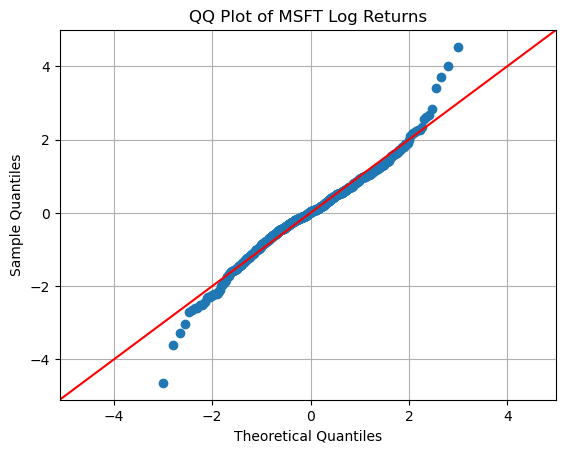

In [20]:
import statsmodels.api as sm

# Standardize returns
standardized_returns = (log_returns['MSFT'] - log_returns['MSFT'].mean()) / log_returns['MSFT'].std()

sm.qqplot(standardized_returns, line='45')
plt.title('QQ Plot of MSFT Log Returns')
plt.grid()
plt.show()

The QQ plot shows that the log returns of MSFT are close to normally distributed around the mean, but deviate from normality at the tails. This is consistent with findings from part (b) and (c), although it may be difficult to what is happening at the tails.

## (e)

In [21]:
import scipy.stats as stats

In [22]:
kurt = stats.kurtosis(log_returns['MSFT'], fisher=False)
skew = stats.skew(log_returns['MSFT'])

print('Kurtosis =', kurt)
print('Skewness =', skew)

Kurtosis = 4.8874483051075455
Skewness = -0.09651652102184168


In [23]:
T = len(log_returns['MSFT'])

# t-stats
skew_t_stat = skew / np.sqrt(6/T)
kurt_t_stat = (kurt - 3) / np.sqrt(24/T)

# Test for skewness
skew_p_value = 2 * (1-stats.t.cdf(abs(skew_t_stat), df=T-1))
if skew_p_value < 0.05:
    print('Reject null hypothesis, conclude the skewness is significantly different from 0.')
else:
    print('Fail to reject null hypothesis that skewness is significantly different from 0.')

# Test for kurtosis
kurt_p_value = 1 - stats.t.cdf(kurt_t_stat, df=T-1)
if kurt_p_value < 0.05:
    print('Reject null hypothesis, conclude the kurtosis is greater than 3.')
else:
    print('Fail to reject null hypothesis that kurtosis is significantly different from 3.')

Fail to reject null hypothesis that skewness is significantly different from 0.
Reject null hypothesis, conclude the kurtosis is greater than 3.


The skewness estimator is consistent with the normal assumtption on the log returns of MSFT, but the kurtosis estimator is not.

## (f)

In [24]:
stats.jarque_bera(log_returns['MSFT'])

SignificanceResult(statistic=112.49133936793702, pvalue=3.739521420788831e-25)

The Jarque Bera test produces a p-value less than 0.05, meaning we reject the null hypothesis that the log returns of MSFT are normally distributed.

## (g)

In [25]:
# Estimate parameters
v_hat, mu_hat, lambda_hat = stats.t.fit(log_returns['MSFT'])

# Bootsrapping
n = len(log_returns)
nboot = 1000
boot_samples = np.zeros((nboot, 3))

for i in range(nboot):
    sample = np.random.choice(log_returns['MSFT'], replace=True, size=n)
    v_b, mu_b, lambda_b = stats.t.fit(sample)
    boot_samples[i] = [v_b, mu_b, lambda_b]

se_v, se_mu, se_lambda = boot_samples.std(axis=0)

In [26]:
# Confidence Intervals
v_CI = [v_hat - 1.96*se_v, v_hat + 1.96*se_v]
mu_CI = [mu_hat - 1.96*se_mu, mu_hat + 1.96*se_mu]
lambda_CI = [lambda_hat - 1.96*se_lambda, lambda_hat + 1.96*se_lambda]

In [66]:
data = {
    'μ': [mu_hat, se_mu, np.round(mu_CI, 3)],
    'λ': [lambda_hat, se_lambda, np.round(lambda_CI, 3)],
    'ν': [v_hat, se_v, np.round(v_CI, 3)]
}

row_labels = ['MLE', 'SE_bt', 'CI']

df=pd.DataFrame(data, index = row_labels)

In [67]:
print(df)

                     μ               λ               ν
MLE           0.071455        1.385767        5.296559
SE_bt         0.058621        0.066038        1.282694
CI     [-0.043, 0.186]  [1.256, 1.515]  [2.782, 7.811]


The upper bound for the 95% confidence interval for $v$ is less than 10, meaning we reject $H_{0}: v \geq 10$.